In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vamos definir os métodos utilizados nessa avaliação e uma função para esboçar gráficos

In [11]:
def bisseccao(a, b, f, erromax, maxiter=50, iter=0, verro=[]):
    x = (a+b)/2
    iter += 1
    erro = abs((x-a)/x)
    verro.append(erro)
    if erro <= erromax or iter == maxiter or f(x)==0:
      return x, iter, verro
    if f(a)*f(x) < 0:
      return bisseccao(a, x, f, erromax, maxiter, iter, verro)
    return bisseccao(x, b, f, erromax, maxiter, iter, verro)  

In [3]:
def falsaposicao(a, b, f, erromax, maxiter=50, iter=0, verro=[]):
    x = (a*f(b) - b*f(a))/(f(b)-f(a))
    iter += 1
    erro = abs((x-a)/x)
    verro.append(erro)
    if erro<=erromax or iter==maxiter or f(x)==0:
      return x, iter, verro
    if f(a)*f(x) < 0:
      return falsaposicao(a, x, f, erromax, maxiter, iter, verro)
    return falsaposicao(x, b, f, erromax, maxiter, iter, verro)

In [4]:
def newtonraphson(xk, f, g, erromax, maxiter=50, iter=0, verro=[]):
  x = xk - (f(xk)/g(xk))
  erro = abs((x-xk)/x)
  verro.append(erro)
  iter += 1
  if erro <= erromax or iter == maxiter:
    return x, iter, verro
  return newtonraphson(x, f, g, erromax, maxiter, iter, verro)

In [5]:
def secante(xj, xk, f, erromax, maxiter=50, iter=0, verro=[]):
  x = (xj*f(xk)-xk*f(xj))/(f(xk)-f(xj))
  erro = abs((x-xk)/x)
  verro.append(erro)
  iter += 1
  if erro <= erromax or iter == maxiter:
    return x, iter, verro
  return secante(xk, x, f, erromax, maxiter, iter, verro)

In [6]:
def plotagrafico(f, xmin, xmax, niter):
  x = np.linspace(xmin,xmax,niter)
  y = f(x)
  plt.grid()
  plt.plot(x, y)

**QUESTÃO 1**

In [7]:
def f1(x):
  return x**3 - x - 1

Vamos, primeiramente, utilizar o método da bissecção para calcular a raiz da função no intervalo [1,2]

In [12]:
x1_bissec, numiter1_bissec, verro1_bissec = bisseccao(1, 2, f1, 1e-06, 100)

In [13]:
x1_bissec

1.3247175216674805

In [14]:
numiter1_bissec

20

In [15]:
verro1_bissec[-1]

7.1990767903924e-07

Uma vez que verro possui todos os erros armazenados durante as iterações, do método, verro[-1] possuirá o erro final. Vamos agora comparar esse resultado com o método da falsa posição

In [16]:
x1_fp, numiter1_fp, verro1_fp = falsaposicao(1, 2, f1, 1e-06, 100)

In [17]:
x1_fp

1.324717498779053

In [18]:
numiter1_fp

16

In [19]:
verro1_fp[-1]

4.7008828617568334e-07

Podemos observar que o número de iterações realizadas pelo método da falsa posição foi menor que o realizado pelo método da bissecção, além de ter obtido um erro menor. Portanto, o método da falsa posição foi mais efetivo para avaliar essa função no intervalo designado. Vamos analisar o gráfico da função para ter uma noção do desempenho dos métodos

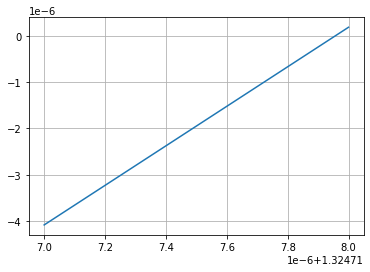

In [31]:
plotagrafico(f1, 1.324717, 1.324718, 1000)

Apesar de tudo, o método da bissecção obteve um valor mais próximo da raiz real! (Lembrando que os erros encontrados com as funções são apenas aproximações, para calcularmos o erro real precisaríamos da raiz real, recurso do qual não dispomos)

In [20]:
#Programa que retorna o número de iterações e os erros de cada método
def questao1():
  x1_bissec, numiter1_bissec, verro1_bissec = bisseccao(1, 2, f1, 1e-06, 100)
  x1_fp, numiter1_fp, verro1_fp = falsaposicao(1, 2, f1, 1e-06, 100)
  return numiter1_bissec, verro1_bissec[-1], numiter1_fp, verro1_fp[-1]

In [22]:
questao1()

(20, 7.1990767903924e-07, 16, 4.7008828617568334e-07)

**QUESTÃO 2**

In [23]:
def f2(x):
  return x**3 - x**2 - 2*x + 1

Para utilizar o método de Newton-Raphson, precisamos calcular f'(x) (chamaremos de g2(x)

In [24]:
def g2(x):
  return 3*x**2 - 2*x - 2

Como o intervalo a ser analisado é [1,2], vamos utilizar xk=1.5 como estimativa inicial.

In [28]:
x2_nr, numiter2_nr, verro2_nr = newtonraphson(1.5, f2, g2, 0.0001)
x2_nr

1.801937735806029

Para o método da secante, utilizaremos x-1 = 1 e x0=2

In [29]:
x2_sec, numiter2_sec, verro2_sec = secante(1, 2, f2, 0.0001)
x2_sec

1.8019379399261022

Os dois métodos convergiram para o mesmo valor, vamos observar o gráfico da função para avaliar seus desempenhos.

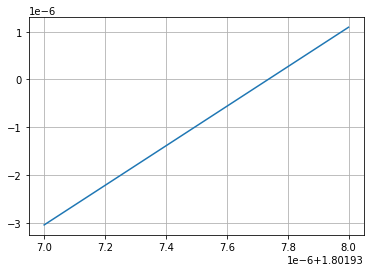

In [30]:
plotagrafico(f2, 1.801937, 1.801938, 1000)

Aparentemente, o método de Newton-Raphson aproximou-se mais da raiz real que o método da secante.

**QUESTÃO 3**

A igualdade cos^3(teta) = sen(teta) ocorrerá quando teta for a raiz da função f3(x) = cos^3(teta) - sen(teta).

In [32]:
def f3(x):
  return np.cos(x)**3 - np.sin(x)

Vamos analisar o gráfico da função para escolher um método adequado e utilizar os melhores parâmetros iniciais.

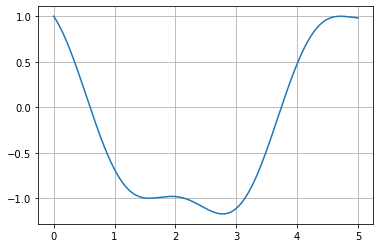

In [35]:
plotagrafico(f3, 0, 5, 1000)

Aparentemente, o intervalo [0,1] parece suficientemente bom para ser analisado. Vamos utilizar o método da secante para encontrar a raiz.

In [37]:
x3_sec, numiter3_sec, verro3_sec = secante(0, 1, f3, 1e-06)
x3_sec

0.5987667052183364

In [38]:
numiter3_sec

4

Um valor que concorda com o observado no gráfico, com alta precisão e obtido rapidamente! (Escolhemos o método da secante pois ele e o de Newton-Raphson parecem ser os mais adequados para investigar funções mais complexas, porém o método de Newton pode divergir quando analisa aproximações em ciclo para funções periódicas. Portanto, como f3(x) envolve senos e cossenos, evitamos que isso ocorra. O método da secante convergirá desde que escolhamos pontos com valores suficientemente distantes entre si).

**QUESTÃO 4**

In [45]:
def encontraintervalos(f, num, min=-1000, max=1000):
  intervalos = []
  i = min
  while len(intervalos) < num and i < max:
    if f(i)*f(i+1) < 0:
      intervalos.append([i, i+1])
    i += 1
  return intervalos

Com a função definida acima, podemos encontrar o número de zeros desejado dentro de um intervalo especificado

ITEM A

In [41]:
def f4a(x):
  return 1.5*x**3 - 1.5*x**2 - 3**x + 2

In [46]:
encontraintervalos(f4a, 100, -500, 500)

[[-1, 0], [0, 1], [2, 3], [3, 4]]

Vamos utilizar o método da bissecção para encontrar as raízes nesses intervalos e comparar com os gráficos.

In [60]:
x41_bissec, numiter41_bissec, verro41_bissec = bisseccao(-1, 0, f4a, 1e-06)
x41_bissec

-0.7692656517028809

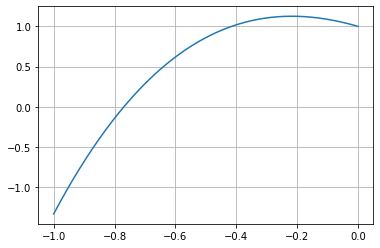

In [54]:
plotagrafico(f4a, -1, 0, 1000)

In [49]:
x42_bissec, numiter42_bissec, verro42_bissec = bisseccao(0, 1, f4a, 1e-06)
x42_bissec

0.5351786613464355

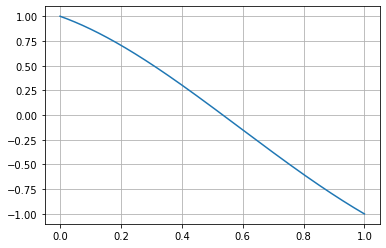

In [55]:
plotagrafico(f4a, 0, 1, 1000)

In [50]:
x43_bissec, numiter43_bissec, verro43_bissec = bisseccao(2, 3, f4a, 1e-06)
x43_bissec

2.3612613677978516

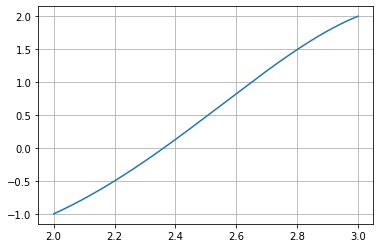

In [56]:
plotagrafico(f4a, 2, 3, 1000)

In [51]:
x44_bissec, numiter44_bissec, verro44_bissec = bisseccao(3, 4, f4a, 1e-06)
x44_bissec

3.6334781646728516

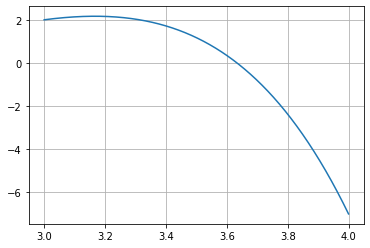

In [57]:
plotagrafico(f4a, 3, 4, 1000)

Os gráficos mostram que as aproximações obtidas pelo método da bissecção foram muito boas.

ITEM C

In [61]:
def f4c(x):
  return x*np.log(x) - 1

In [64]:
encontraintervalos(f4c, 100, 0, 10000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


[[1, 2]]

Foi encontrado um único intervalo pela função. Vamos analisá-lo com o método da falsa posição.}

In [66]:
x4_fp, numiter4_fp, verro4_fp = falsaposicao(1, 2, f4c, 1e-06, 100)
x4_fp

1.7632228302998445

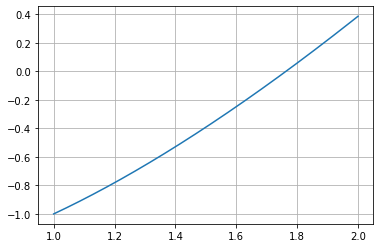

In [67]:
plotagrafico(f4c, 1, 2, 1000)

O gráfico mostra uma boa aproximação para o valor encontrado da raiz.

**QUESTÃO 5**

Vamos utilizar a Regra de Sinal de Descartes para analisar os polinômios solicitados:

In [92]:
import itertools
def regradesinal(parametros):
  v = 0
  tamanho = len(parametros)
  for i in range(0, tamanho-1):
    x = i+1
    while(parametros[x]==0 and x<tamanho):
      x += 1
    if parametros[i]*parametros[x]<0:
      v += 1
  if v % 2 == 0:
    p = list(range(0,v+1,2))
  else:
    p = list(range(1,v+1,2))

  if tamanho % 2 == 0:
    for i in range(0, tamanho, 2):
      parametros[i]=-parametros[i]
  else:
    for i in range(1,tamanho,2):
      parametros[i]=-parametros[i]
  
  v=0
  for i in range(0, tamanho-1):
    x = i+1
    while(parametros[x]==0 and x<tamanho):
      x += 1
    if parametros[i]*parametros[x]<0:
      v += 1
  if v % 2 == 0:
    n = list(range(0,v+1,2))
  else:
    n = list(range(1,v+1,2))
  return p, n

ITEM A

In [96]:
regradesinal([2, 3, -2, 3, -1])

([1, 3], [1])

Há duas possibilidades:




1) 3 raízes positivas e 1 negativa





2) 1 raiz positiva, 1 negativa e 1 par complexo conjugado

ITEM B

In [97]:
regradesinal([1,1,-9,-1,20,-12])

([1, 3], [0, 2])

Há quatro possibilidades:




1) 3 raízes positivas e 2 negativas





2) 3 raízes positivas e 1 par complexo conjugado





3) 1 raiz positiva, 2 negativas e 1 par complexo conjugado





4) 1 raiz positiva 2 pares complexos conjugados

ITEM C

In [98]:
regradesinal([255,-254,253,-252])

([1, 3], [0])

Há duas possibilidades:




1) 3 raízes positivas





2) 1 raiz positiva e 1 par complexo conjugado

ITEM D

In [99]:
regradesinal([3,-2,4,-26,-28,48])

([0, 2, 4], [1])

Há três possibilidades:




1) 4 raízes positivas e 1 negativa





2) 2 raízes positivas, 1 negativa e 1 par complexo conjugado





3) 1 raiz negativa e 2 pares complexos conjugados